In [22]:
import xarray as xr
import os
import matplotlib.pyplot as plt
in_dir = '/Volumes/Naamloos/PhD_Data/CMIP6/regression/zoszostoga_zostoga'

models = [m for m in os.listdir(in_dir) if '.' not in m] #exclude MRI?]

In [18]:
coefs = []
for m,model in enumerate(models):
    coefs.append(xr.open_dataset(os.path.join(in_dir,model,'linregression_coefs.nc')))
coefs = xr.concat(coefs,dim='source_id')
coefs['source_id'] = models

Plot coefficients for given model for each SSP, for SSPs merged and for the mean of SSPs:

In [49]:
model_to_plot = 'ACCESS-CM2'

<Figure size 640x480 with 0 Axes>

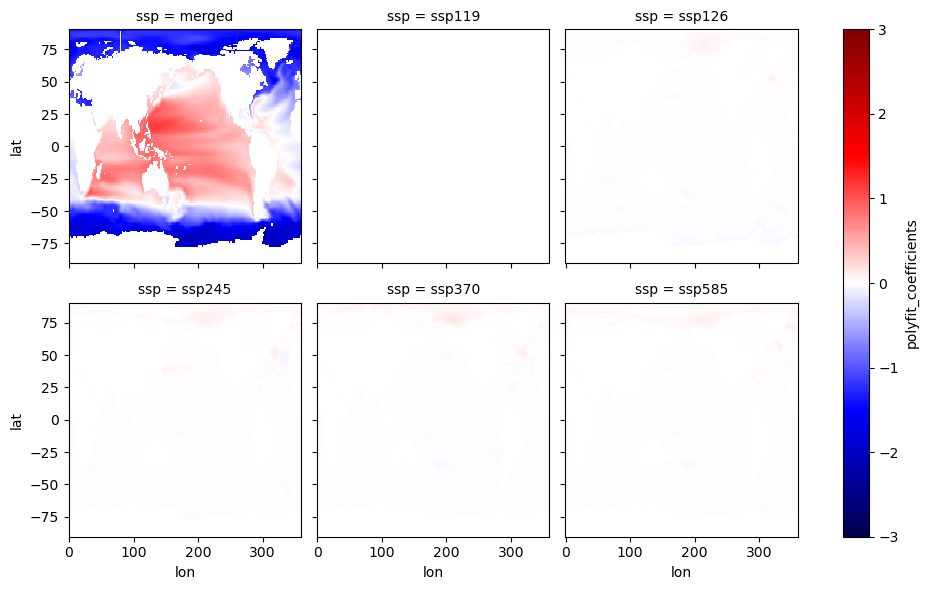

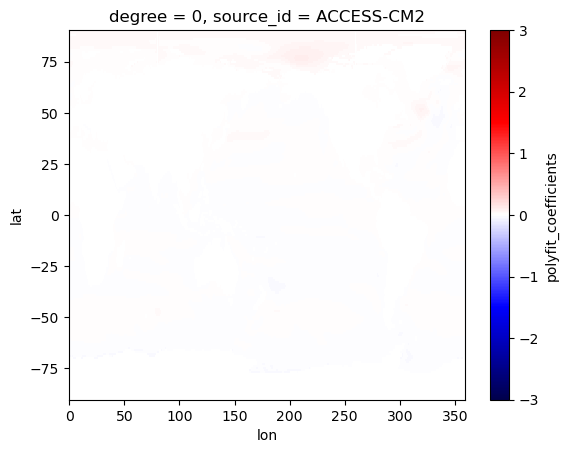

In [50]:
plt.figure()
coefs.sel(source_id=model_to_plot).polyfit_coefficients.sel(degree=0).plot(col="ssp", col_wrap=3,vmin=-3,vmax=3,cmap='seismic')
plt.figure()
coefs.sel(ssp=['ssp119','ssp126','ssp245','ssp370','ssp585']).sel(source_id=model_to_plot).polyfit_coefficients.sel(degree=0).mean(dim='ssp').plot(vmin=-3,vmax=3,cmap='seismic')

<Figure size 640x480 with 0 Axes>

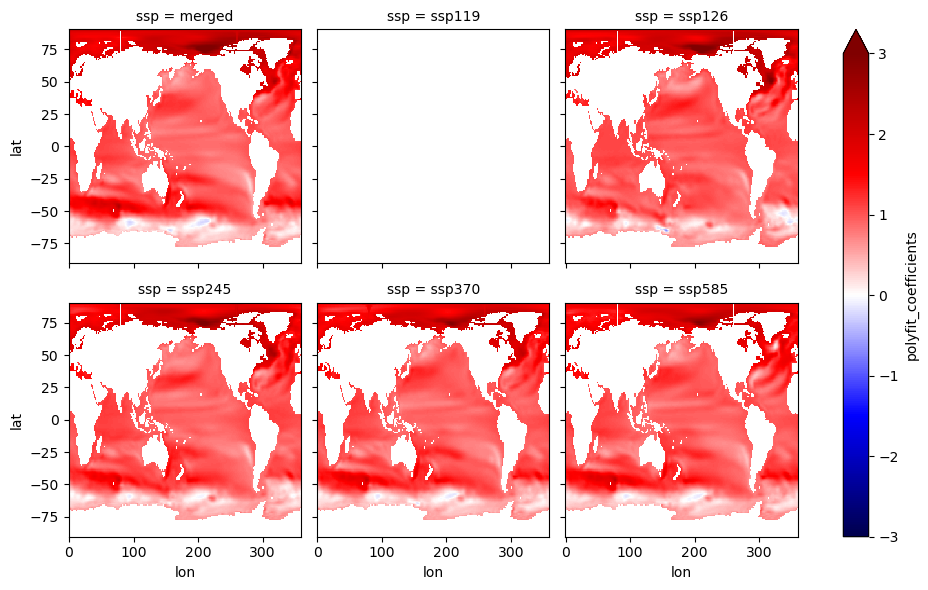

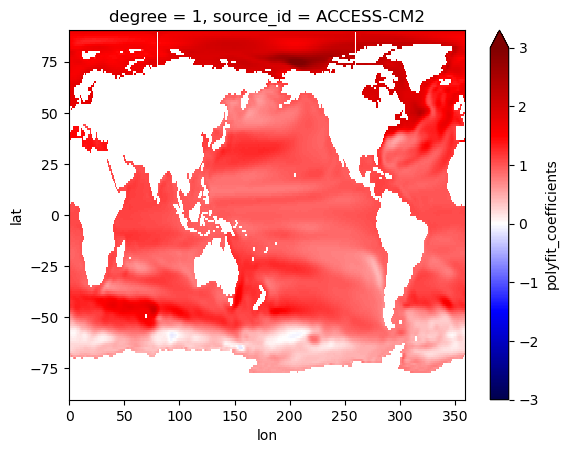

In [51]:
plt.figure()
coefs.sel(source_id=model_to_plot).polyfit_coefficients.sel(degree=1).plot(col="ssp", col_wrap=3,vmin=-3,vmax=3,cmap='seismic')
plt.figure()
coefs.sel(ssp=['ssp119','ssp126','ssp245','ssp370','ssp585']).sel(source_id=model_to_plot).polyfit_coefficients.sel(degree=1).mean(dim='ssp').plot(vmin=-3,vmax=3,cmap='seismic')

Plot coefficients for all models for given SSP:

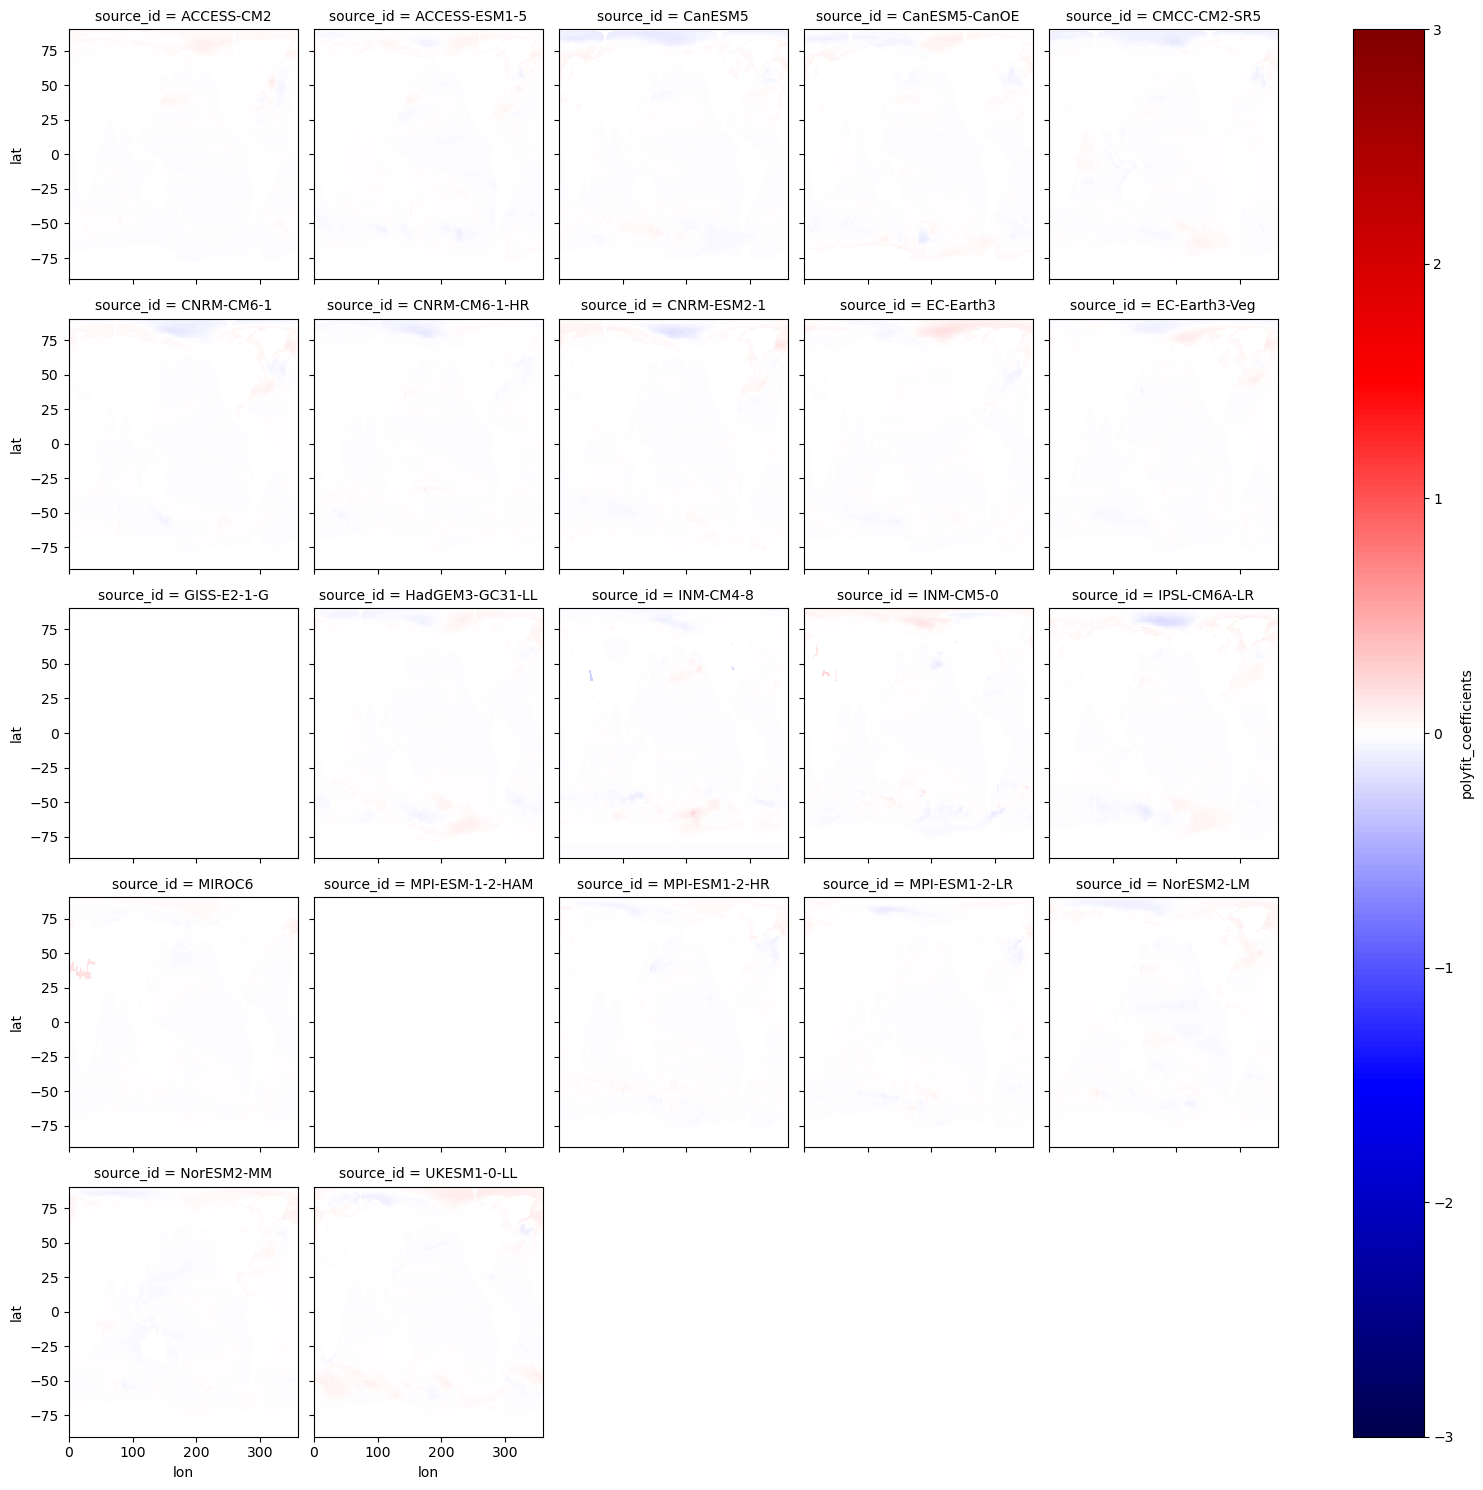

In [46]:
coefs.sel(ssp='ssp245').polyfit_coefficients.sel(degree=0).plot(col="source_id", col_wrap=5,vmin=-3,vmax=3,cmap='seismic')

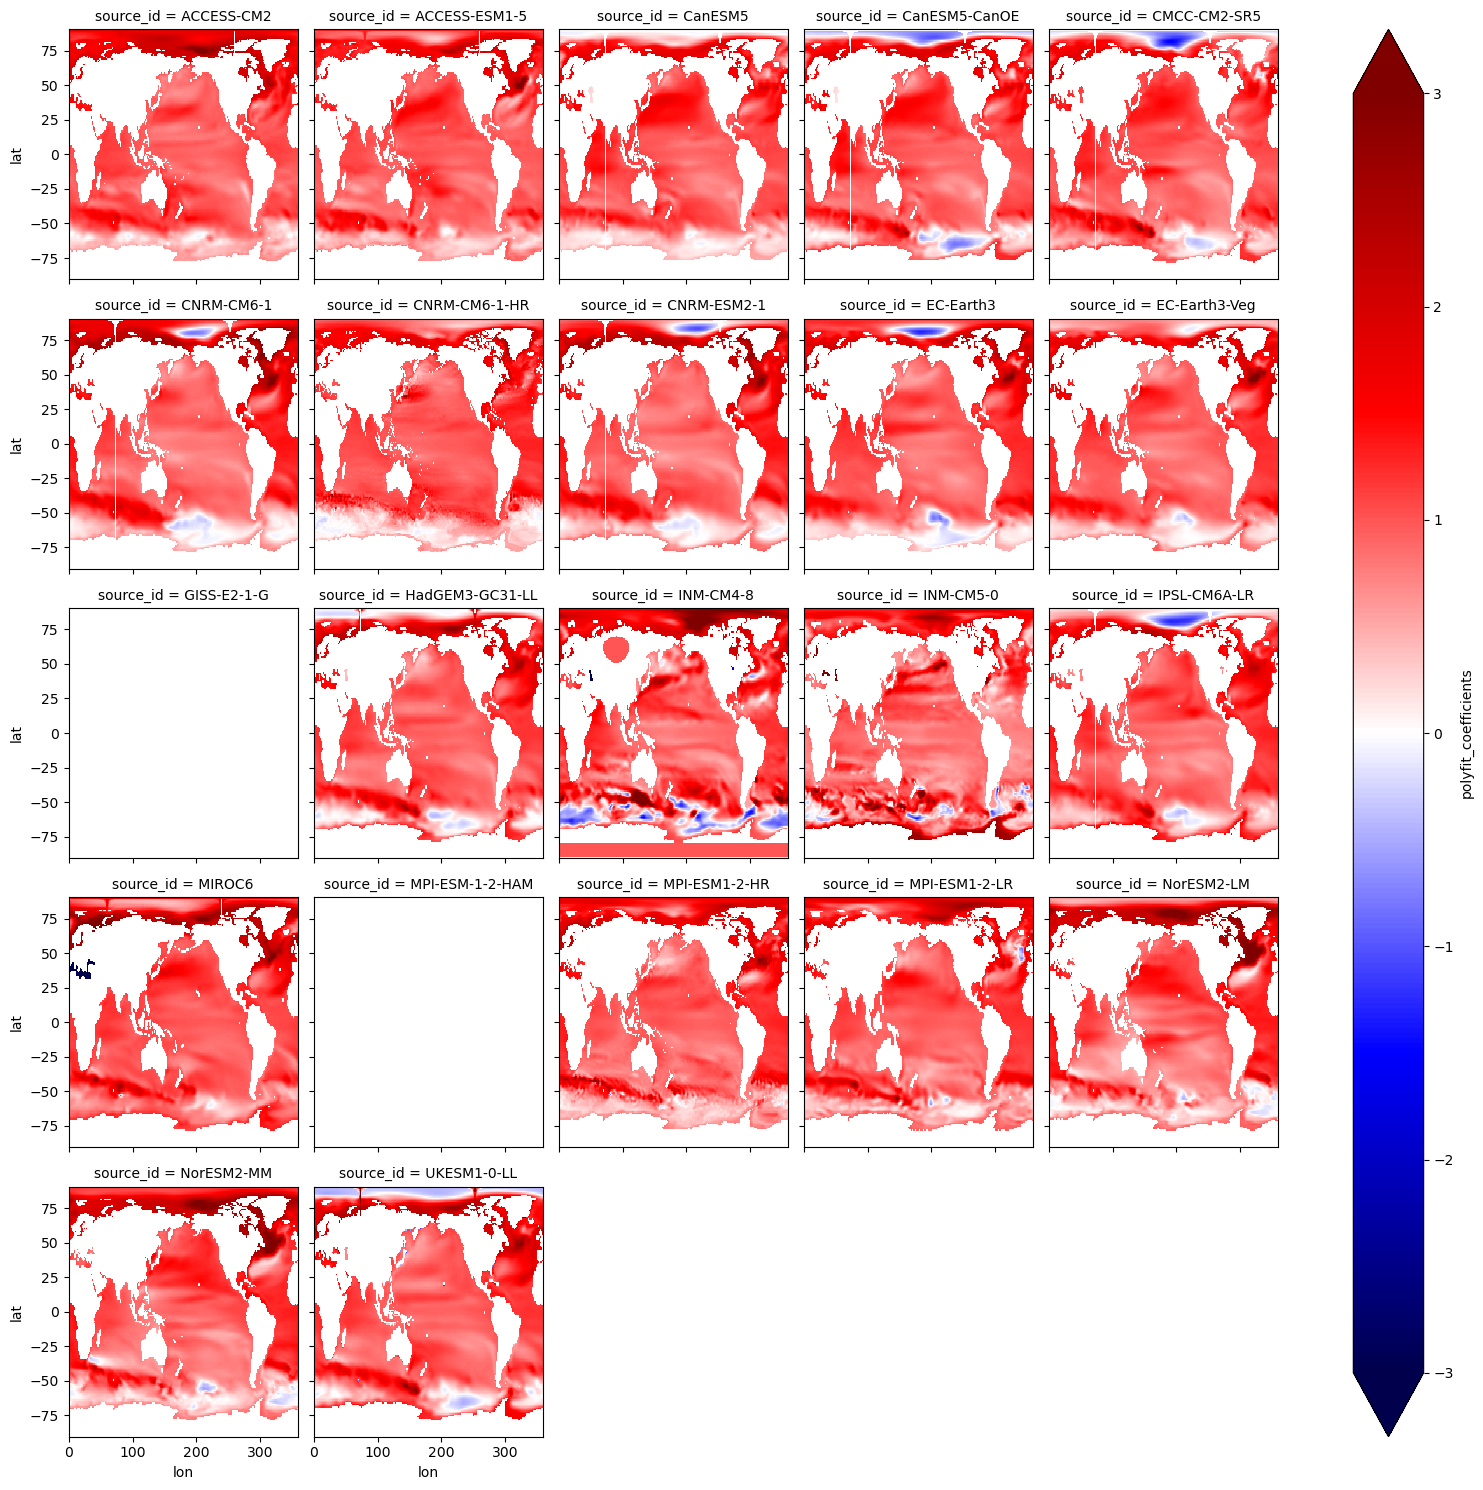

In [47]:
coefs.sel(ssp='ssp245').polyfit_coefficients.sel(degree=1).plot(col="source_id", col_wrap=5,vmin=-3,vmax=3,cmap='seismic')